<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1)-데이터프레임-기초와-필터링" data-toc-modified-id="1)-데이터프레임-기초와-필터링-1">1) 데이터프레임 기초와 필터링</a></span></li><li><span><a href="#2)-요약" data-toc-modified-id="2)-요약-2">2) 요약</a></span></li><li><span><a href="#3)-파생변수-생성" data-toc-modified-id="3)-파생변수-생성-3">3) 파생변수 생성</a></span></li><li><span><a href="#4)-텍스트-데이터-처리" data-toc-modified-id="4)-텍스트-데이터-처리-4">4) 텍스트 데이터 처리</a></span></li><li><span><a href="#6)-Pivoting" data-toc-modified-id="6)-Pivoting-5">6) Pivoting</a></span></li><li><span><a href="#7)-데이터-병합" data-toc-modified-id="7)-데이터-병합-6">7) 데이터 병합</a></span></li><li><span><a href="#8)-기타" data-toc-modified-id="8)-기타-7">8) 기타</a></span></li></ul></div>

Q. 데이터프레임을 다루는 패키지를 불러오자

In [3]:
import pandas as pd

In [4]:
pd.__version__

'0.25.1'

# 1) 데이터프레임 기초와 필터링

- DataFrame 색인 `.colname vs ['colname']`

In [5]:
dict_data=dict(a=[1,2,3,4], shape=[7,34,1,9])

In [6]:
df=pd.DataFrame(dict_data)
df

a  shape
0  1      7
1  2     34
2  3      1
3  4      9

In [7]:
df['a']

0    1
1    2
2    3
3    4
Name: a, dtype: int64

In [8]:
df.a

0    1
1    2
2    3
3    4
Name: a, dtype: int64

In [9]:
df['shape']

0     7
1    34
2     1
3     9
Name: shape, dtype: int64

In [10]:
df.shape

(4, 2)

> 

- DataFrame의 변수명 확인 및 변경

In [11]:
df.columns.values[0] = 'b'

In [12]:
df

b  shape
0  1      7
1  2     34
2  3      1
3  4      9

> 버그있어서 반영이 안되는 경우도 있다!

In [13]:
df=df.rename(columns={'shape':'c'})
df

b   c
0  1   7
1  2  34
2  3   1
3  4   9

- Pandas 객체 필터링  `loc vs. iloc`  
    - file: `krx_202105_utf8.csv`
    - Purely integer-location based indexing for selection by position. `iloc`

In [14]:
df

b   c
0  1   7
1  2  34
2  3   1
3  4   9

In [15]:
df.loc[1:]

b   c
1  2  34
2  3   1
3  4   9

In [16]:
df.iloc[1:]

b   c
1  2  34
2  3   1
3  4   9

> 똑같아 보이죠? 내부 작동은 다르다!

In [17]:
df.index = [11,12,13,14]
df

b   c
11  1   7
12  2  34
13  3   1
14  4   9

In [18]:
df.loc[11:]

b   c
11  1   7
12  2  34
13  3   1
14  4   9

In [19]:
df.iloc[11:]

Empty DataFrame
Columns: [b, c]
Index: []

> loc는 인덱스 이름 기준으로 작동! iloc는 인덱스 순서로 작동


In [20]:
df.loc[0]

KeyError: 0

In [21]:
df.iloc[0]

b    1
c    7
Name: 11, dtype: int64

- 인덱스가 꼬여 있는 경우

In [22]:
df.index = [-3,-1,-1,-4]
df

b   c
-3  1   7
-1  2  34
-1  3   1
-4  4   9

In [23]:
df.loc[:-1]

b   c
-3  1   7
-1  2  34
-1  3   1

> 인덱스 이름 기준으로 앞 인덱스들 가져온다

In [24]:
df.iloc[:-1]

b   c
-3  1   7
-1  2  34
-1  3   1

In [25]:
df.iloc[1:]

b   c
-1  2  34
-1  3   1
-4  4   9

> 바로 마지막 인덱스 순서 제외하고 나온다 df.iloc[1:] vs. df.iloc[:-1]

In [26]:
df.index = ['가','나','다','라']
df

b   c
가  1   7
나  2  34
다  3   1
라  4   9

In [27]:
df.iloc[:-1]

b   c
가  1   7
나  2  34
다  3   1

In [28]:
df.iloc[-1]

b    4
c    9
Name: 라, dtype: int64

In [29]:
df.loc[-1]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [-1] of <class 'int'>

In [30]:
df.loc['다']

b    3
c    1
Name: 다, dtype: int64

> -1 의 사용에 따라 의미가 다름   
`iloc`
슬라이싱[:-1] 할 때는 -1번째 행부터 앞행까지 뜻함
인덱싱[-1] 할 때는 제일 끝을 뜻함
  
> `loc`
는 인덱싱할 때도 인덱스 이름에 없으면 나오지 않음

In [31]:
df.reset_index()

index  b   c
0     가  1   7
1     나  2  34
2     다  3   1
3     라  4   9

In [32]:
df=df.reset_index(drop=True)
df

b   c
0  1   7
1  2  34
2  3   1
3  4   9

---

Q. `krx_202105_utf8.csv` 을 불러오자

In [33]:
import os
os.getcwd()

'C:\\Users\\beluga\\Desktop\\samsung-l2-ds\\Solutions'

In [34]:
df_krx = pd.read_csv('../Datasets/krx_202105_utf8.csv')
df_krx.head(2)

지수명        종가     대비   등락률        시가        고가        저가        거래량  \
0  KRX 300   1901.05 -11.63 -0.61   1913.15   1929.94   1896.65  279548840   
1  KTOP 30  11520.28 -86.30 -0.74  11609.44  11702.14  11490.84   50048566   

             거래대금            상장시가총액        날짜  
0  13488481375036  2028800954161500  20210503  
1   5645660149606  1208343758559140  20210503

Q. 단순회귀(독립 `시가`, 종속 `종가` ) 문제에서 독립변수를 함수에 넣을 때 올바른 방법은?
`df_krx['시가'] vs. df_krx[['시가']]`

In [35]:
df_krx['시가'].shape

(551,)

In [36]:
df_krx[['시가']].shape

(551, 1)

> 패키지 마다 다른데 shape 에러 나면 shape에 맞게 바꿔주면 됨

Q. `지수명` 변수의 원소가 `KRX 300`이거나 `KRX 반도체`인 행을 추출하여 df_krx300_krxban 객체에 저장하시오.

In [37]:
df_krx300_krxban =df_krx.loc[df_krx['지수명'].isin(['KRX 300','KRX 반도체'])]
df_krx300_krxban.head(2)

지수명       종가     대비   등락률       시가       고가       저가        거래량  \
0  KRX 300  1901.05 -11.63 -0.61  1913.15  1929.94  1896.65  279548840   
5  KRX 반도체  3852.24 -20.18 -0.52  3872.85  3940.15  3836.17   19861668   

             거래대금            상장시가총액        날짜  
0  13488481375036  2028800954161500  20210503  
5    952405532133   131186340258830  20210503

Q. df_krx300_krxban 객체에서 `거래대금`이 가장 큰 `지수명`은?

In [38]:
df_krx300_krxban.loc[df_krx300_krxban['거래대금']==df_krx300_krxban['거래대금'].max(), '지수명']

464    KRX 300
Name: 지수명, dtype: object

In [39]:
df_krx300_krxban.loc[464]
# df_krx300_krxban.loc[df_krx300_krxban.loc[:, '거래대금'].idxmax()]

지수명                KRX 300
종가                 1910.09
대비                   -1.59
등락률                  -0.08
시가                 1913.55
고가                 1915.55
저가                 1894.84
거래량              327607567
거래대금        17156385452981
상장시가총액    2043966667110420
날짜                20210527
Name: 464, dtype: object

- 데이터 정렬 `sort_values`

Q. df_krx에서 20210527 에 거래된 지수 중 거래대금이 큰 순으로 5개 추출하면?

In [40]:
df_krx[df_krx.날짜==20210527].sort_values(by='거래대금', ascending=False)[:5]

지수명        종가     대비   등락률        시가        고가        저가  \
464       KRX 300   1910.09  -1.59 -0.08   1913.55   1915.55   1894.84   
466       KRX 100   6631.32  -9.37 -0.14   6646.38   6653.30   6574.30   
465       KTOP 30  11450.08 -41.91 -0.36  11486.14  11497.12  11339.63   
483      KRX 정보기술   1732.05   9.16  0.53   1727.73   1736.84   1704.28   
485  KRX 300 정보기술   2805.77  15.35  0.55   2798.53   2813.72   2760.15   

           거래량            거래대금            상장시가총액        날짜  
464  327607567  17156385452981  2043966667110420  20210527  
466  146420657  12129156337634  1697216654394830  20210527  
465   65398765   7845326920724  1193021507292880  20210527  
483   50025879   3306883824066   700064121819690  20210527  
485   44179081   3225022154176   696336543173370  20210527

- 결측치 처리 `isna` `fillna`  
    - file: `iris_missing.csv` 

Q. `iris_missing.csv` 을 불러오자 (20초)

In [41]:
df_iris = pd.read_csv('../Datasets/iris_missing.csv')
df_iris.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          NaN           NaN          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [42]:
df_iris.isna()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0           False         True          True        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146          True        False          True         True    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False         True    False

[150 rows x 5 columns]

Q. setosa기준으로 Sepal.Width 평균으로 Sepal.Width na값을 대체한 후 df_iris에 반영하라 (5분)

In [43]:
mean_setosa_sepal_width=df_iris.loc[df_iris.Species=='setosa', 'Sepal.Width'].mean()
mean_setosa_sepal_width

3.4444444444444446

In [44]:
df_iris.loc[df_iris.Species=='setosa' , 'Sepal.Width'].head(2)

0    NaN
1    3.0
Name: Sepal.Width, dtype: float64

In [45]:
df_iris.loc[df_iris.Species=='setosa' , 'Sepal.Width'].fillna(mean_setosa_sepal_width)[:2]

0    3.444444
1    3.000000
Name: Sepal.Width, dtype: float64

In [46]:
df_iris.loc[df_iris.Species=='setosa' , 'Sepal.Width'] = df_iris.loc[(df_iris.Species=='setosa') , 'Sepal.Width'].fillna(mean_setosa_sepal_width)

Q. isna를 사용하여 위의 결과를 그대로 반영하는 코드를 작성하시오

In [47]:
df_iris.loc[(df_iris.Species=='setosa') & (df_iris['Sepal.Width'].isna()), 'Sepal.Width']=mean_setosa_sepal_width

In [48]:
df_iris

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1     3.444444           NaN          0.2     setosa
1             4.9     3.000000           1.4          0.2     setosa
2             4.7     3.200000           1.3          0.2     setosa
3             4.6     3.100000           1.5          0.2     setosa
4             5.0     3.600000           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7     3.000000           5.2          2.3  virginica
146           NaN     2.500000           NaN          NaN  virginica
147           6.5     3.000000           5.2          2.0  virginica
148           6.2     3.400000           5.4          2.3  virginica
149           5.9     3.000000           5.1          NaN  virginica

[150 rows x 5 columns]

# 2) 요약 
- file:`bike_sharing.csv`, `diamonds.csv`

- 원소 개수 확인 `unique` `value_counts` `crosstab`

In [49]:
df_bike = pd.read_csv('../Datasets/bike_sharing.csv')
df_bike[:5]

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [50]:
df_bike['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [51]:
df_bike['season'].nunique()

4

In [52]:
df_bike['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [53]:
df_bike['season'].value_counts(normalize=True).round(3)

4    0.251
3    0.251
2    0.251
1    0.247
Name: season, dtype: float64

Q. weather 와 season의 동시출현수를 한 번에 표현하라

In [54]:
pd.crosstab(df_bike['weather'], df_bike['season'],margins=True)

season      1     2     3     4    All
weather                               
1        1759  1801  1930  1702   7192
2         715   708   604   807   2834
3         211   224   199   225    859
4           1     0     0     0      1
All      2686  2733  2733  2734  10886

In [55]:
pd.crosstab(df_bike['weather'], df_bike['season'],margins=True,normalize=True).round(2)

season      1     2     3     4   All
weather                              
1        0.16  0.17  0.18  0.16  0.66
2        0.07  0.07  0.06  0.07  0.26
3        0.02  0.02  0.02  0.02  0.08
4        0.00  0.00  0.00  0.00  0.00
All      0.25  0.25  0.25  0.25  1.00

In [56]:
# pd.crosstab(df_bike['weather'], df_bike.loc[df_bike['season']==1,'season'], normalize=True)*100
# pd.crosstab(df_bike.season, df_bike.weather, margins=True, normalize=0).round(2)*100

 - 그룹화 `groupby`

Q. diamonds 데이터를 가져와서 cut을 기준으로 그룹화를 한 후 가격(price)에 대한 'min','median'를 구한 후 median기준으로 오름차순이 되게 하세요

In [57]:
df_diamond = pd.read_csv('../Datasets/diamonds.csv')
df_diamond.head(3)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

In [58]:
df_diamond.groupby('cut')['price'].agg(['min','median']).sort_values(by='median')

min  median
cut                   
Ideal      326  1810.0
Very Good  336  2648.0
Good       327  3050.5
Premium    326  3185.0
Fair       337  3282.0

# 3) 파생변수 생성
- file:`bike_sharing.csv`

In [59]:
df_bike.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

Q. 월별로 자전거 대여횟수의 트렌드를 나타낼 수 있게 전처리를 하여라  
+(option) 가능하다면 그래프로 시각화 하여라
- casual: 미등록회원 대여횟수
- registered: 등록회원 대여횟수

In [60]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [61]:
df_bike['datetime'] = pd.to_datetime(df_bike['datetime'])

In [64]:
df_bike['month']=df_bike['datetime'].dt.month

In [65]:
df_bike.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  month  
0        81        0.0       3          13     16      1  
1        80        0.0       8          32     40      1  
2        80        0.0       5          27     32      1  
3        75        0.0       3          10     13      1  
4        75        0.0       0           1      1      1

In [66]:
df_bike.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  month  
10881  19.695        50    26.0027       7         329    336     12  
10882  17.425        57    15.0013      10         231    241     12  
10883  15.910        61    15.0013       4         164    168     12  
10884  17.425        61     6.0032      12         117    129     12  
10885  16.665        66     8.9981       4          84     88     12

In [67]:
df_bike_month_trend=df_bike.groupby('month')['count'].sum()

In [68]:
df_bike_month_trend

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

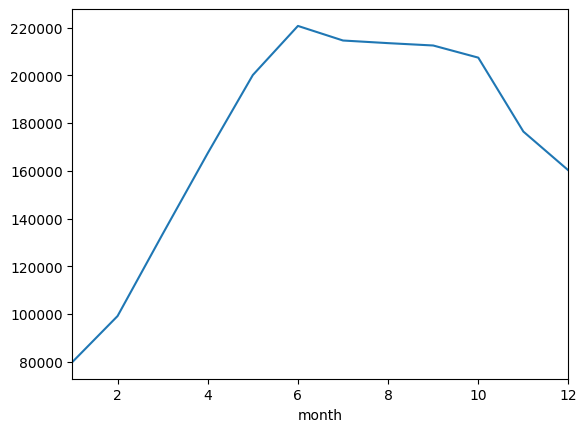

In [69]:
df_bike_month_trend.plot();
# import matplotlib.pyplot as plt
# plt.plot(df_bike_month_trend);

# 4) 텍스트 데이터 처리

In [70]:
df_krx.지수명.unique()

array(['KRX 300', 'KTOP 30', 'KRX 100', 'KRX Mid 200', 'KRX 자동차',
       'KRX 반도체', 'KRX 헬스케어', 'KRX 은행', 'KRX 에너지화학', 'KRX 철강', 'KRX 방송통신',
       'KRX 건설', 'KRX 증권', 'KRX 기계장비', 'KRX 보험', 'KRX 운송', 'KRX 경기소비재',
       'KRX 필수소비재', 'KRX 미디어&엔터테인먼트', 'KRX 정보기술', 'KRX 유틸리티',
       'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재', 'KRX 300 산업재',
       'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'],
      dtype=object)

- 지수명이 `KRX 300` 을 포함하는 데이터만 가져오기

In [71]:
df_krx.loc[df_krx.지수명.str.contains('KRX 300'),'지수명'].unique()

array(['KRX 300', 'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재',
       'KRX 300 산업재', 'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재',
       'KRX 300 필수소비재'], dtype=object)

- 지수명이 `KRX 300`, `KRX 자동차` 을 포함하는 데이터만 가져오기

In [72]:
df_krx[df_krx.지수명.str.contains('KRX 300|KRX 자동차')]['지수명'].unique()

array(['KRX 300', 'KRX 자동차', 'KRX 300 정보기술', 'KRX 300 금융',
       'KRX 300 자유소비재', 'KRX 300 산업재', 'KRX 300 헬스케어',
       'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'], dtype=object)

In [73]:
df_krx[df_krx.지수명.str.contains('KRX 300| KRX 자동차')]['지수명'].unique()

array(['KRX 300', 'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재',
       'KRX 300 산업재', 'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재',
       'KRX 300 필수소비재'], dtype=object)

> 'KRX 자동차' 가 없어지죠?ㅡ

In [74]:
df_krx[df_krx.지수명.str.contains('KRX 300|KRX 자동차')]['지수명'].nunique()

10

In [75]:
df_krx[df_krx.지수명.str.contains('KRX 300| KRX 자동차')]['지수명'].nunique()

9

> 주의! `|` 다음에 띄어쓰기 하면 안됨. 

Q. diamond데이터에서 cut이 `Good` 을 포함하는 행만 가져오라

In [76]:
df_diamond['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [77]:
df_diamond.loc[df_diamond['cut'].str.contains('Good'), 'cut'].unique()

array(['Good', 'Very Good'], dtype=object)

In [78]:
df_diamond.loc[df_diamond['cut'].isin(['Good']), 'cut'].unique()

array(['Good'], dtype=object)

In [ ]:
df_diamond.loc[df_diamond['cut'].isin(['Good', 'Very Good']), 'cut'].unique()

> isin는 동등비교를 합니다. 
'Good' == 'Good', 'Good' != 'very Good',   

> contains는 내부글자들의 비교를 합니다.
'Good'이란 글자가 있는지 없는지
그래서 Good으로 했을 때 very Good이 출력이 됩니다. 

# 6) Pivoting

- melt  
file: `weather.csv`
> 컬럼을 녹여서 행으로 보낸다

In [79]:
df_weather = pd.read_csv('../Datasets/weather.csv')
df_weather.head()

day  chicago  chennai  berlin
0     Monday       32       75      41
1    Tuesday       30       77      43
2  Wednesday       28       75      45
3   Thursday       22       82      38
4     Friday       30       83      30

Q. berlin, chicago 의 일별 날씨 트렌드를 나타내는 데이터 차트로 표현하고 싶다. (melt 이용)

In [80]:
df_weather_melt_day=df_weather.melt(id_vars='day', value_name='temp') #id_vars = 살리고싶은 컬럼
df_weather_melt_day

day variable  temp
0      Monday  chicago    32
1     Tuesday  chicago    30
2   Wednesday  chicago    28
3    Thursday  chicago    22
4      Friday  chicago    30
5    Saturday  chicago    20
6      Sunday  chicago    25
7      Monday  chennai    75
8     Tuesday  chennai    77
9   Wednesday  chennai    75
10   Thursday  chennai    82
11     Friday  chennai    83
12   Saturday  chennai    81
13     Sunday  chennai    77
14     Monday   berlin    41
15    Tuesday   berlin    43
16  Wednesday   berlin    45
17   Thursday   berlin    38
18     Friday   berlin    30
19   Saturday   berlin    45
20     Sunday   berlin    47

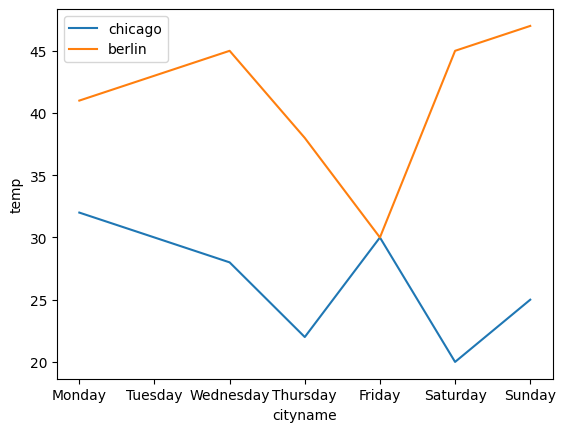

In [81]:
#시험에 그래프 그려라는 없어서 추이 확인할 땐 아래 쉬운 코드를 사용하세요.
import matplotlib.pyplot as plt
figure,axes = plt.subplots()

for cityname in ['chicago','berlin']:
    axes.plot(df_weather_melt_day.loc[df_weather_melt_day['variable']==cityname,'day'], \
            df_weather_melt_day.loc[df_weather_melt_day['variable']==cityname,'temp']  ,label=cityname)

axes.set_xlabel("cityname")
axes.set_ylabel("temp")
axes.legend(loc='best');

In [82]:
df_weather

day  chicago  chennai  berlin
0     Monday       32       75      41
1    Tuesday       30       77      43
2  Wednesday       28       75      45
3   Thursday       22       82      38
4     Friday       30       83      30
5   Saturday       20       81      45
6     Sunday       25       77      47

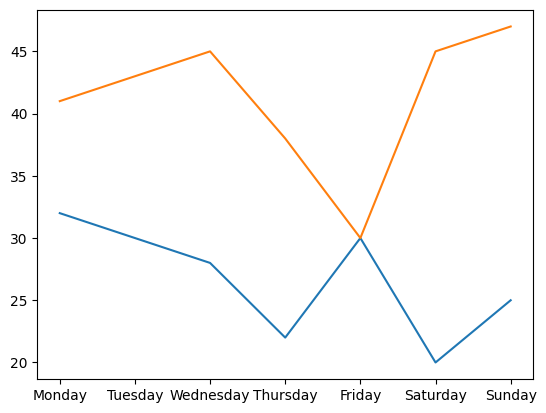

In [83]:
plt.plot(df_weather['day'], df_weather['chicago'])
plt.plot(df_weather['day'], df_weather['berlin']);

> 더 간단히도 할 수 있다.

# 7) 데이터 병합

- `concat`

- vertical로 붙이기

In [84]:
df1, df2=df_weather[:3], df_weather[3:]

In [85]:
df_concat1=pd.concat([df1, df2], axis=0)
df_concat1

day  chicago  chennai  berlin
0     Monday       32       75      41
1    Tuesday       30       77      43
2  Wednesday       28       75      45
3   Thursday       22       82      38
4     Friday       30       83      30
5   Saturday       20       81      45
6     Sunday       25       77      47

In [86]:
df1.shape

(3, 4)

In [87]:
df_concat1.shape

(7, 4)

> "변화하는 shape의 순서가 axis이다"

- horizontal로 붙이기

In [88]:
df3, df4=df_weather[['day','chicago']], df_weather[['chennai','berlin']]

In [89]:
df_concat2=pd.concat([df3, df4], axis=1)
df_concat2

day  chicago  chennai  berlin
0     Monday       32       75      41
1    Tuesday       30       77      43
2  Wednesday       28       75      45
3   Thursday       22       82      38
4     Friday       30       83      30
5   Saturday       20       81      45
6     Sunday       25       77      47

In [90]:
df3.shape

(7, 2)

In [91]:
df_concat2.shape

(7, 4)

- merge
`vlookup`
- 테이블이 분리되어 있는 경우
    - ex) 보안수준

In [92]:
d1 = {'Name': ['장준규', '홍길동', '운영자'], 'ID': ['A1', 'B1', 'A3'], 'Country': ['India', 'India', 'USA'],
      'Role': ['CEO', 'CSO', 'CTO']}
df1 = pd.DataFrame(d1)
df1

Name  ID Country Role
0  장준규  A1   India  CEO
1  홍길동  B1   India  CSO
2  운영자  A3     USA  CTO

In [93]:
df2 = pd.DataFrame({'ID': ['A1', 'A2', 'A3', 'B1'], 'Security_Level': ['VIP1', 'VIP2', 'VIP3','VIP4']})
df2 

ID Security_Level
0  A1           VIP1
1  A2           VIP2
2  A3           VIP3
3  B1           VIP4

Q. ID기준으로 두 df를 merge하라 (2분)

In [94]:
df_merge=pd.merge(left=df1, right=df2, how='left', on='ID')
df_merge

Name  ID Country Role Security_Level
0  장준규  A1   India  CEO           VIP1
1  홍길동  B1   India  CSO           VIP4
2  운영자  A3     USA  CTO           VIP3

Q. df1의 인덱스는 df2의 ID를 뜻한다. 이를 기준으로 두 df를 merge 하라 (5분)

In [95]:
d1 = {'Name': ['장준규', '홍길동', '운영자'], 'Country': ['India', 'India', 'USA'],
      'Role': ['CEO', 'CSO', 'CTO']}
df1 = pd.DataFrame(d1, index=['A1', 'B1', 'A3'])
df1
# df1.index = df1.pop('ID')
# df1.index.name = None

Name Country Role
A1  장준규   India  CEO
B1  홍길동   India  CSO
A3  운영자     USA  CTO

In [96]:
df2

ID Security_Level
0  A1           VIP1
1  A2           VIP2
2  A3           VIP3
3  B1           VIP4

In [99]:
pd.merge(left=df1, right=df2, how='left', left_index=True, right_on='ID')

Name Country Role  ID Security_Level
0  장준규   India  CEO  A1           VIP1
3  홍길동   India  CSO  B1           VIP4
2  운영자     USA  CTO  A3           VIP3

# 8) 기타

- lambda

Q. df_merge 에서 'CTO' 이면 1 아니면 0 인 `is_CTO` 컬럼을 사용자 정의 함수를 이용하여 작성하시오.(lambda 이용 X)

In [100]:
def is_CTO(x):
    if x=='CTO':
        return 1
    else:
        return 0

In [101]:
df_merge['is_CTO']=df_merge['Role'].apply(is_CTO)
df_merge

Name  ID Country Role Security_Level  is_CTO
0  장준규  A1   India  CEO           VIP1       0
1  홍길동  B1   India  CSO           VIP4       0
2  운영자  A3     USA  CTO           VIP3       1

Q. 위 문제를 lambda를 사용해서 작성하시오

In [102]:
df_merge['Role'].apply(lambda x: 1 if x=='CTO' else 0)


0    0
1    0
2    1
Name: Role, dtype: int64

Q. df_merge 에서 'CTO' 이면 1, 'CSO'이면 2, 나머지는 3 인 `Role2` 컬럼을 만들어 보세요

In [103]:
df_merge['Role2']=df_merge['Role'].apply(lambda x: 1 if x=='CTO' else (2 if x=='CSO' else 3))
df_merge

Name  ID Country Role Security_Level  is_CTO  Role2
0  장준규  A1   India  CEO           VIP1       0      3
1  홍길동  B1   India  CSO           VIP4       0      2
2  운영자  A3     USA  CTO           VIP3       1      1

- 정규표현식 regular expression

In [104]:
text = '마동석씨의 핸드폰 번호는 010-1234-5678 입니다 홍길동씨의 핸드폰 번호는 010-4567-5678 입니다 마동석씨의 핸드폰 번호는 010-1234-5678 입니다'

In [105]:
import re
pattern = re.compile("01[0-9]{1}-[0-9]{4}-[0-9]{4}")
pattern.findall(text)

['010-1234-5678', '010-4567-5678', '010-1234-5678']

Q. 지수명이 KRX 300 을 포함하는 데이터만 가져올 때 위에서 배운 법칙(숫자 골라내기)을 사용하라

In [106]:
df_krx.loc[df_krx.지수명.str.contains('KRX 3[0-9]{2}'),'지수명'].unique()

array(['KRX 300', 'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재',
       'KRX 300 산업재', 'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재',
       'KRX 300 필수소비재'], dtype=object)